In [1]:
# import necessary python libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# show all rows in pandas commands
# pd.set_option("display.max_rows", None)

In [4]:
# load dataset

In [6]:
df = pd.read_csv('loan.csv')

In [7]:
# data understanding

In [8]:
df.shape

(39717, 111)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
# problem statement: Analyse to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [12]:
# Data Undertanding

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [14]:
df.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

In [15]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [16]:
# data cleaning

In [17]:
# missing values column 
#Strategy
# (a) Columns having high percentage of missing values (>40% or 50%), directly discard that column from the analysis
# (b) Columns having missing values under acceptable range we prefer to impute them(replace with some values)
# (c) For numarical columns we prefer to use mean or median (Median is preferred)
# (d) Median is not affected with the outliers
# (e) for categorical column we refer to use mode
# (f) if we have very less missing values in any column in that case you can drop rows as well
# (g) for a target variable - if there are missing values, drop the row

In [18]:
# removing columns which has all values as null

In [19]:
df_clean = df.drop(['tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m', 'tot_cur_bal', 'tot_coll_amt','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint'], axis=1)

In [20]:
df_clean.shape

(39717, 57)

In [21]:
df_clean.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [22]:
df_clean.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325855
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [23]:
df_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [24]:
# Categorical columns
cats_cols=["term","int_rate","grade","sub_grade","","emp_length","home_ownership", "verification_status","loan_status","purpose","title","zip_code","addr_state","delinq_2yrs","inq_last_6mths", "mths_since_last_delinq", "pub_rec","pub_rec_bankruptcies"]
# Numerical columns
num_cols=["loan_amnt","funded_amnt", "funded_amnt_inv", "annual_inc","dti","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","recoveries"]
# Not relevant to the analysis
extra_cols=["id","member_id","installment","emp_title", "issue_d","pymnt_plan", "desc","earliest_cr_line","mths_since_last_record","total_rec_late_fee","collection_recovery_fee","last_pymnt_d","collections_12_mths_ex_med"]

# dont know
#"open_acc","revol_bal","revol_util","total_acc","last_credit_pull_d",""

In [25]:
df_clean["emp_title"].isnull().mean()

0.06191303472064859

In [26]:
# Remove Rows
# Remove rows where emp_title is null ??? or instead of removing rows we add some values to that field, anyways this  column is not important for analysis == to be finalized
# command
# df_clean = df_clean[~(df_clean['emp_title'].isnull())]

# same for emp_length
# df_clean = df_clean[~(df_clean['emp_length'].isnull())]

In [27]:
# Remove Columns
# pymnt_plan = all the values in this column is 'n' - so column is not needed hence removed
# initial_list_status = all the values in this column is 'f' - so column is not needed hence removed
# collections_12_mths_ex_med - single value, hence removed
# policy_code - single value, hence removed
# application_type - single value, hence removed
# verification_status_joint - single value, hence removed
# chargeoff_within_12_mths - single value, hence removed
# delinq_amnt - single value, hence removed
# tax_liens - single value, hence removed

In [28]:
# Update values in rows
# mths_since_last_delinq - do we add median value for this column?
#Can be removed more than 90% of the data is missing


In [29]:
df_clean = df_clean.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','delinq_amnt','tax_liens'], axis=1)

In [30]:
# below code to identify which columns are needed and which ones can be dropped

In [31]:
df_clean["grade"].dtype

dtype('O')

In [32]:
df_clean["grade"].isnull().sum()

0

In [33]:
df_clean["grade"].isnull().mean()

0.0

In [34]:
df_clean["grade"].value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [35]:
#Check the datatypes of all the columns 

In [36]:
df_clean.dtypes

id                            int64
member_id                     int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                         object
int_rate                     object
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
url                          object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
earliest_cr_line             object
inq_last_6mths                int64
mths_since_last_delinq      

In [37]:
df_clean.shape

(39717, 49)

In [38]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies'],
      dtype='object')

In [39]:
df_clean.isnull().mean()

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   0.061913
emp_length                  0.027066
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                        0.325855
purpose                     0.000000
title                       0.000277
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

In [40]:
#Dropping month_since_last_record and next_paymnt_d as more than 90% of data is missing

df_clean = df_clean.drop(["mths_since_last_record","next_pymnt_d"],axis=1)


In [41]:
df_clean.shape

(39717, 47)

In [42]:


df_clean.isnull().mean()

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   0.061913
emp_length                  0.027066
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                        0.325855
purpose                     0.000000
title                       0.000277
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

In [43]:
#mths_since_last_delinq
df["mths_since_last_delinq"].value_counts()

mths_since_last_delinq
0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: count, Length: 95, dtype: int64

In [44]:
df["mths_since_last_delinq"].isnull().sum()

25682

In [45]:
df["mths_since_last_delinq"].describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [46]:
df["mths_since_last_delinq"].median()

34.0

In [47]:
#There are two ways to deal with it 
#a)Delete the column because more than 60% of values are missing 
#b)Fill the missing values with median 
#TBD


In [48]:
df_clean.shape

(39717, 47)

In [49]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies'],
      dtype='object')

In [50]:
#Filling other null values

In [51]:
df_clean.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                   1075
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
url                             0
desc                        12942
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
mths_since_last_delinq      25682
open_acc                        0
pub_rec       

In [52]:
#emp_title
#Not sure what to do
df_clean["emp_title"].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [53]:
#emp_length.
df_clean["emp_length"].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [54]:
df_clean["emp_length"].fillna(df_clean["emp_length"].mode()[0],inplace=True)

In [55]:
df_clean.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
url                             0
desc                        12942
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
mths_since_last_delinq      25682
open_acc                        0
pub_rec       

In [56]:
#desc column is not needed as this is covered in loan purpose
df_clean = df_clean.drop(["desc"],axis=1)

In [57]:
#title
#df_clean["title"].value_counts
df_clean["title"].fillna(df_clean["title"].mode()[0],inplace=True)

In [58]:
#mths_since_last_delinq
#Not sure what to do

df_clean["mths_since_last_delinq"].value_counts()

mths_since_last_delinq
0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: count, Length: 95, dtype: int64

In [59]:
#revol_util
df_clean["revol_util"].value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [60]:
#use mode 
df_clean["revol_util"].fillna(df_clean["revol_util"].mode()[0],inplace=True)

In [61]:
#last_pymnt_d
df_clean["last_pymnt_d"].value_counts()

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

In [62]:
#use mode
df_clean["last_pymnt_d"].fillna(df_clean["last_pymnt_d"].mode()[0],inplace=True)


In [63]:
#last_credit_pull_d --- Use mode
df_clean["last_credit_pull_d"].fillna(df_clean["last_credit_pull_d"].mode()[0],inplace=True)

In [64]:
#charge_off_within_12mths"
df_clean["chargeoff_within_12_mths"].value_counts()

chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

In [65]:
#all values are zero,we can either drop this column or impute the remaining values with 0
#drop the column
df_clean = df_clean.drop(["chargeoff_within_12_mths"],axis=1)

In [66]:
#pub_rec_bankruptcies
df_clean["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [67]:
df_clean["pub_rec_bankruptcies"].fillna(df_clean["pub_rec_bankruptcies"].mode()[0],inplace=True)

In [68]:
df_clean.shape

(39717, 45)

In [69]:
#Evaluating the data beyond 90th Percentile and below 10th Percentile
#int_rate,annual_income

In [70]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [71]:
df_clean.corr(numeric_only=True)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.180591,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,-0.000569
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,0.000809
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.036284
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.037636
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.037982
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.033746
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016514
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.007021
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.002954
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.015652


In [72]:
#let us see if the 90th percentile show any interesting results for loan_amnt

In [73]:
#Removing the current loans from analysis

In [74]:
df_clean=df_clean[df_clean["loan_status"] != "Current"]

In [75]:
df_clean["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [76]:
#Caluculating the percentage of loans charged off
#chargedOffloans*100/(FullyPaid + ChargedOffLoans)


In [77]:
PercentOfLoansChargedOff=5627*100/(32950+5267)

In [78]:
print(PercentOfLoansChargedOff)

14.723814009472225


In [79]:
x90 = np.percentile(df_clean.loan_amnt,90)
print(x90)

21600.0


In [80]:
df_clean[df_clean.loan_amnt > 21600]["loan_status"].value_counts()

loan_status
Fully Paid     3050
Charged Off     776
Name: count, dtype: int64

In [81]:
#Percent Of loans chargedOff beyond 90th percentile
PercentOfLoansChargedOffBeyond90thPercentile=776*100/(776+3050)

In [82]:
print(PercentOfLoansChargedOffBeyond90thPercentile)

20.28227914270779


In [83]:
###Insight1
#To conclude 
#At higher loan amounts the percent of charged off loans over total loans increased by 5 percentage points and one in every five loans charged off 

In [ ]:
#let us see if the 90th percentile show any interesting results for interest rate

In [82]:
df_clean["int_rate"]=df_clean["int_rate"].apply(lambda x:x.strip("%"))

In [84]:
df_clean["int_rate"]=df_clean["int_rate"].apply(lambda x:float(x))

In [112]:
x90 = np.percentile(df_clean.int_rate,90)
print(x90)

16.82


In [113]:
df_clean[df_clean.int_rate > 16.82]["loan_status"].value_counts()

loan_status
Fully Paid     2593
Charged Off    1162
Name: count, dtype: int64

In [114]:
PercentOfLoansChargedOffBeyond90thPercentileInterest=1162*100/(2593+1162)

In [115]:
print(PercentOfLoansChargedOffBeyond90thPercentileInterest)

30.945406125166446


In [ ]:
###Insight2:
#At higher interest rates, charged off loans  as a percentage of  total loans doubled when compared to overall range of data
#Three loans in every ten loans charged off,meaning there is correlation between higher interest rate and loan getting chargedoff

In [ ]:
#To findout if higher installments have caused more defaults

In [116]:
x90 = np.percentile(df_clean.installment,90)
print(x90)

620.9


In [117]:
df_clean[df_clean.installment > 620.0]["loan_status"].value_counts()

loan_status
Fully Paid     3228
Charged Off     638
Name: count, dtype: int64

In [118]:
PercentOfLoansChargedOffBeyond90thPercentileInstallment=638*100/(3228+638)

In [119]:
print(PercentOfLoansChargedOffBeyond90thPercentileInstallment)

16.502845318158304


In [ ]:
#To conclude that higher installments have not caused more chargedoffs.
#While for the overall range chargedOff loans percentage is 15%(Approx),for values beyond 90th Percentile it is just 16%(Approx)

In [ ]:
#To findout if higher dti is causing more charged off loans

In [120]:
x90 = np.percentile(df_clean.dti,90)
print(x90)

22.29


In [121]:
df_clean[df_clean.dti > 22.29]["loan_status"].value_counts()

loan_status
Fully Paid     3206
Charged Off     639
Name: count, dtype: int64

In [123]:
PercentOfLoansChargedOffBeyond90thPercentileDti=639*100/(639+3206)

In [124]:
print(PercentOfLoansChargedOffBeyond90thPercentileDti)

16.618985695708712


In [ ]:
#To conclude that higher dti have not caused more chargedoffs
#While for the overall range chargedOff loans percentage is 15%(Approx),for values beyond 90th Percentile it is just 16%(Approx)

In [ ]:
#let us find out if higher incomes have caused chargedoff loans

In [229]:
x90 = np.percentile(df_clean.annual_inc,90)
print(x90)

115000.0


In [230]:
df_clean[df_clean.annual_inc > 115000]["loan_status"].value_counts()

loan_status
Fully Paid     3425
Charged Off     429
Name: count, dtype: int64

In [231]:
PercentOfLoansChargedOffBeyond90thPercentileIncome=429*100/(429+3425)

In [232]:
print(PercentOfLoansChargedOffBeyond90thPercentileIncome)

11.131292163985469


In [ ]:
#Higher incomes havenot caused more chargedoff loans

In [ ]:
#let us find out if lower interest rates have caused more chargedoff loans

In [128]:
x10 = np.percentile(df_clean.int_rate,10)
print(x10)

7.14


In [129]:
df_clean[df_clean.int_rate < 7.14]["loan_status"].value_counts()

loan_status
Fully Paid     3668
Charged Off     177
Name: count, dtype: int64

In [130]:
PercentOfLoansChargedOffBelow10thPercentileIntRate=177*100/(3668+177)

In [131]:
print(PercentOfLoansChargedOffBelow10thPercentileIntRate)

4.603381014304292


In [ ]:
###Insight3
#When the interest rate is very low,the percent of charged off loans is way to less when compared to the overall range
#Which means when the interest rate is very low,very few loans gets charged off

In [ ]:
#let us find out if lower loan amounts have caused more chargedoff loans

In [132]:
x10 = np.percentile(df_clean.loan_amnt,10)
print(x10)

3090.000000000009


In [133]:
df_clean[df_clean.loan_amnt < 3090]["loan_status"].value_counts()

loan_status
Fully Paid     3308
Charged Off     550
Name: count, dtype: int64

In [134]:
PercentOfLoansChargedOffBelow10thPercentileLoanAmt=550*100/(550+3308)

In [136]:
print(PercentOfLoansChargedOffBelow10thPercentileLoanAmt)

14.25609123898393


In [ ]:
#Lower loan amounts have not caused more charged off loans.
#percent of loans chagrged off in this case is 14% when compared to 15% overall.Not much difference

In [97]:
#let us find out if lower installments have caused more defaults

In [137]:
x10 = np.percentile(df_clean.installment,10)
print(x10)

98.99000000000002


In [138]:
df_clean[df_clean.installment < 98.99]["loan_status"].value_counts()

loan_status
Fully Paid     3278
Charged Off     580
Name: count, dtype: int64

In [139]:
PercentOfLoansChargedOffBelow10thPercentileDti=580*100/(580+3278)

In [140]:
print(PercentOfLoansChargedOffBelow10thPercentileDti)

15.03369621565578


In [ ]:
#Lower loan amounts have not caused more charged off loans.
#percent of loans chagrged off in this case is 15% when compared to 15% overall.No difference

In [ ]:
#let us find out if lower incomes have caused more chargedoff loans

In [233]:
x10 = np.percentile(df_clean.annual_inc,10)
print(x10)

30000.0


In [234]:
df_clean[df_clean.annual_inc < 30000]["loan_status"].value_counts()

loan_status
Fully Paid     3043
Charged Off     700
Name: count, dtype: int64

In [235]:
PercentOfLoansChargedOffBelow10thPercentileIncome=700*100/(700+3043)

In [236]:
print(PercentOfLoansChargedOffBelow10thPercentileIncome)

18.701576275714668


In [ ]:
#lower incomes have not caused more chargedoff loans

In [ ]:
##End of outlier analysis

In [ ]:
#Let us analyse if home ownership can indicate more/less charged off loans(As own home means no mortage and no rent and more 
#disposable income for loan)

In [141]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [142]:
df_clean["home_ownership"].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [143]:
df_clean[df_clean["home_ownership"]=="OWN"]["loan_status"].value_counts()

loan_status
Fully Paid     2532
Charged Off     443
Name: count, dtype: int64

In [144]:
PercentChargedOffOwnHouse=443*100/(443+2532)

In [145]:
print(PercentChargedOffOwnHouse)

14.890756302521009


In [ ]:
#Not much difference 15 and 14.89

In [146]:
df_clean[df_clean["home_ownership"]=="RENT"]["loan_status"].value_counts()

loan_status
Fully Paid     15641
Charged Off     2839
Name: count, dtype: int64

In [148]:
PercentChargedOffRentHouse=2389*100/(2389+15641)

In [149]:
print(PercentChargedOffRentHouse)

13.250138657792569


In [ ]:
#Not much difference

In [150]:
df_clean[df_clean["home_ownership"]=="MORTGAGE"]["loan_status"].value_counts()

loan_status
Fully Paid     14694
Charged Off     2327
Name: count, dtype: int64

In [151]:
PercentChargedOffMortage=2327*100/(2327+14694)

In [152]:
print(PercentChargedOffMortage)

13.67134715939134


In [153]:
#Home ownership has no impact on loans

In [ ]:
#Let us analyse the impact of employment length

In [154]:
df_clean["emp_length"].value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [155]:
df_clean.pivot_table(index="loan_status",columns="emp_length",aggfunc='count')

addr_state                                                    \
emp_length      1 year 10+ years 2 years 3 years 4 years 5 years 6 years   
loan_status                                                                
Charged Off        456      1559     567     555     462     458     307   
Fully Paid        2713      7962    3724    3457    2880    2736    1861   

                                     ...  zip_code                          \
emp_length  7 years 8 years 9 years  ... 10+ years 2 years 3 years 4 years   
loan_status                          ...                                     
Charged Off     263     203     158  ...      1559     567     555     462   
Fully Paid     1448    1232    1068  ...      7962    3724    3457    2880   

                                                              
emp_length  5 years 6 years 7 years 8 years 9 years < 1 year  
loan_status                                                   
Charged Off     458     307     263     203     158      639  
Fully Paid     2736    1861    1448    1232    1068     3869  

[2 rows x 473 columns]

In [158]:
df_empLength=pd.crosstab(df_clean["emp_length"],df_clean["loan_status"])

In [159]:
df_empLength["ChargedOffPercent"]=df_empLength["Charged Off"]/(df_empLength["Charged Off"]+df_empLength["Fully Paid"])

In [160]:
df_empLength

loan_status,Charged Off,Fully Paid,ChargedOffPercent
emp_length,,,
1 year,456,2713,0.143894
10+ years,1559,7962,0.163743
2 years,567,3724,0.132137
3 years,555,3457,0.138335
4 years,462,2880,0.138241
5 years,458,2736,0.143394
6 years,307,1861,0.141605
7 years,263,1448,0.153711
8 years,203,1232,0.141463


In [ ]:
#Charged off percentage across various emplengths is equal to overall percentage.
#emp_length is not impacting the chargedoff loans

In [ ]:
#loan term and its impact on chargedoff loans

In [161]:
df_term=pd.crosstab(df_clean["term"],df_clean["loan_status"])

In [162]:
df_term

loan_status,Charged Off,Fully Paid
term,,
36 months,3227,25869
60 months,2400,7081


In [163]:
df_term["ChargedOffPercent"]=df_term["Charged Off"]*100/(df_term["Charged Off"]+df_term["Fully Paid"])

In [164]:
df_term

loan_status,Charged Off,Fully Paid,ChargedOffPercent
term,,,
36 months,3227,25869,11.090872
60 months,2400,7081,25.313785


In [210]:
type(df_term)
df_term.index

Index([' 36 months', ' 60 months'], dtype='object', name='term')

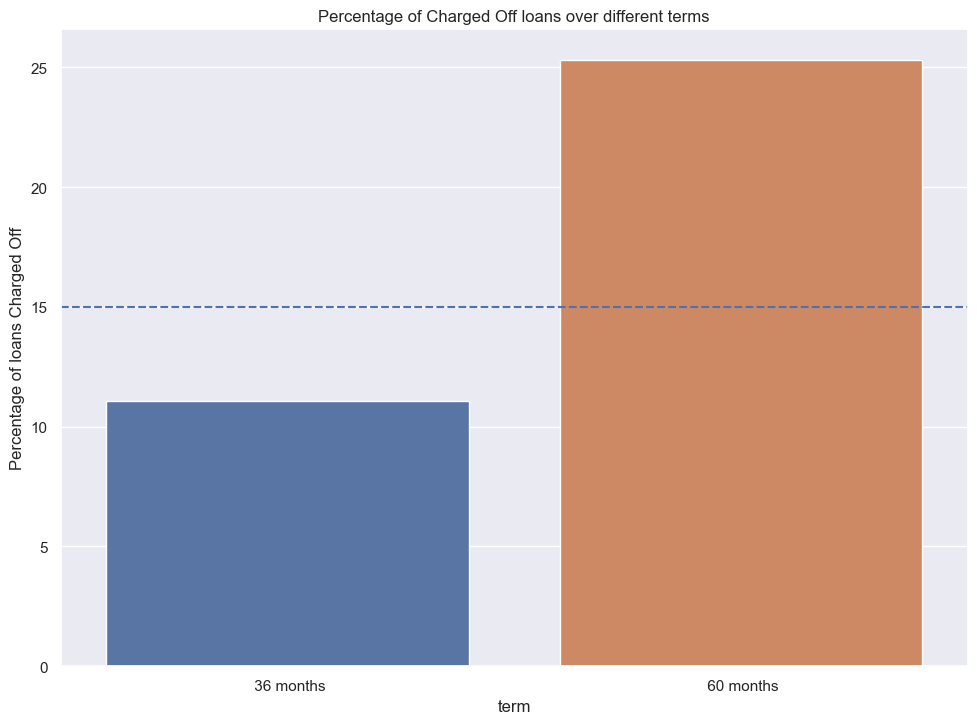

In [228]:
termplot=sns.barplot(x=df_term.index,y=df_term.ChargedOffPercent)
termplot.set_title("Percentage of Charged Off loans over different terms")
termplot.set_ylabel("Percentage of loans Charged Off")
termplot.axhline(y=15,linestyle="dashed")



In [ ]:
###Insight4
#When the loan term is 60 months,25% of the total loans  got chargedoff

In [ ]:
#loan grade and its impact on charged off loans

In [166]:
df_grade=pd.crosstab(df_clean["grade"],df_clean["loan_status"])

In [167]:
df_grade

loan_status,Charged Off,Fully Paid
grade,,
A,602,9443
B,1425,10250
C,1347,6487
D,1118,3967
E,715,1948
F,319,657
G,101,198


In [168]:
df_grade["ChargedOffPercent"]=df_grade["Charged Off"]*100/(df_grade["Charged Off"]+df_grade["Fully Paid"])

In [169]:
df_grade

loan_status,Charged Off,Fully Paid,ChargedOffPercent
grade,,,
A,602,9443,5.993031
B,1425,10250,12.205567
C,1347,6487,17.194281
D,1118,3967,21.986234
E,715,1948,26.849418
F,319,657,32.684426
G,101,198,33.779264


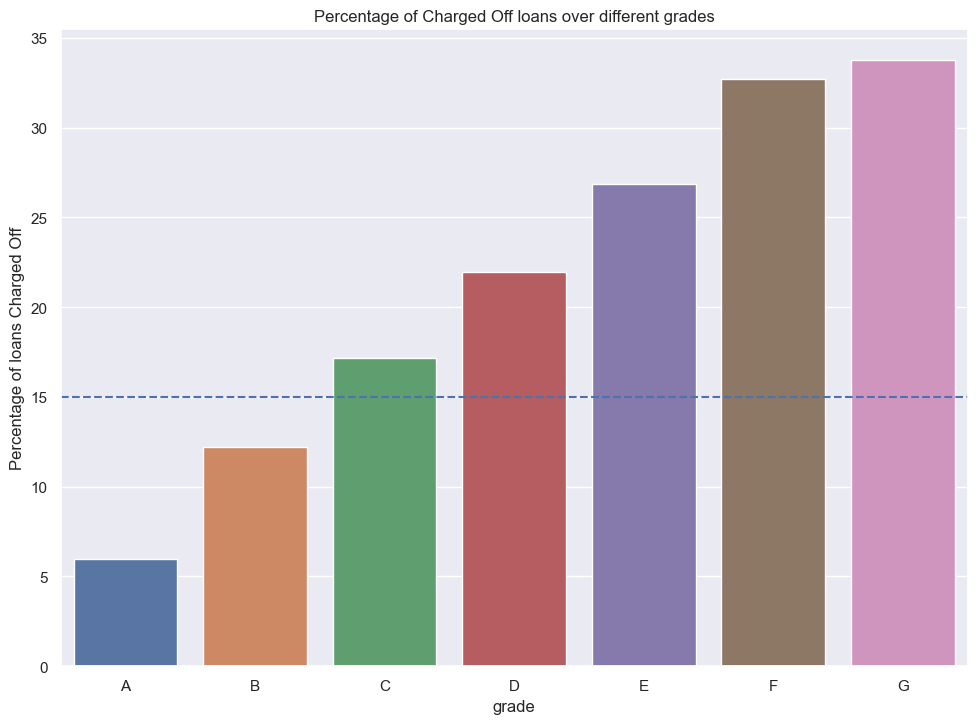

In [227]:
gradeplot=sns.barplot(x=df_grade.index,y=df_grade.ChargedOffPercent)
gradeplot.set_title("Percentage of Charged Off loans over different grades")
gradeplot.set_ylabel("Percentage of loans Charged Off")
gradeplot.axhline(y=15,linestyle="dashed")


In [ ]:
###Insight5
#As the grade of loan moves from A to G,the percentage of chargedoff loans keeps increasing.
#While only 6% of the grade A loans ended up in charged Off ,In grade G over 33% of the loans are chargedoff

In [ ]:
#loan sub_grade and its impact on chargedoff loans

In [170]:
df_subgrade=pd.crosstab(df_clean["sub_grade"],df_clean["loan_status"])

In [171]:
df_subgrade

loan_status,Charged Off,Fully Paid
sub_grade,,
A1,30,1109
A2,74,1434
A3,103,1707
A4,178,2695
A5,217,2498
B1,171,1626
B2,228,1773
B3,341,2484
B4,329,2108


In [172]:
df_subgrade["ChargedOffPercent"]=df_subgrade["Charged Off"]*100/(df_subgrade["Charged Off"]+df_subgrade["Fully Paid"])

In [173]:
df_subgrade

loan_status,Charged Off,Fully Paid,ChargedOffPercent
sub_grade,,,
A1,30,1109,2.633889
A2,74,1434,4.907162
A3,103,1707,5.690608
A4,178,2695,6.195614
A5,217,2498,7.992634
B1,171,1626,9.515860
B2,228,1773,11.394303
B3,341,2484,12.070796
B4,329,2108,13.500205


In [175]:
df_subgrade.sort_values("ChargedOffPercent",ascending=False)

loan_status,Charged Off,Fully Paid,ChargedOffPercent
sub_grade,,,
F5,54,59,47.787611
G3,19,26,42.222222
G2,28,49,36.363636
F4,53,98,35.099338
G5,10,19,34.482759
G1,31,63,32.978723
F2,70,163,30.042918
F1,91,214,29.836066
E4,126,298,29.716981


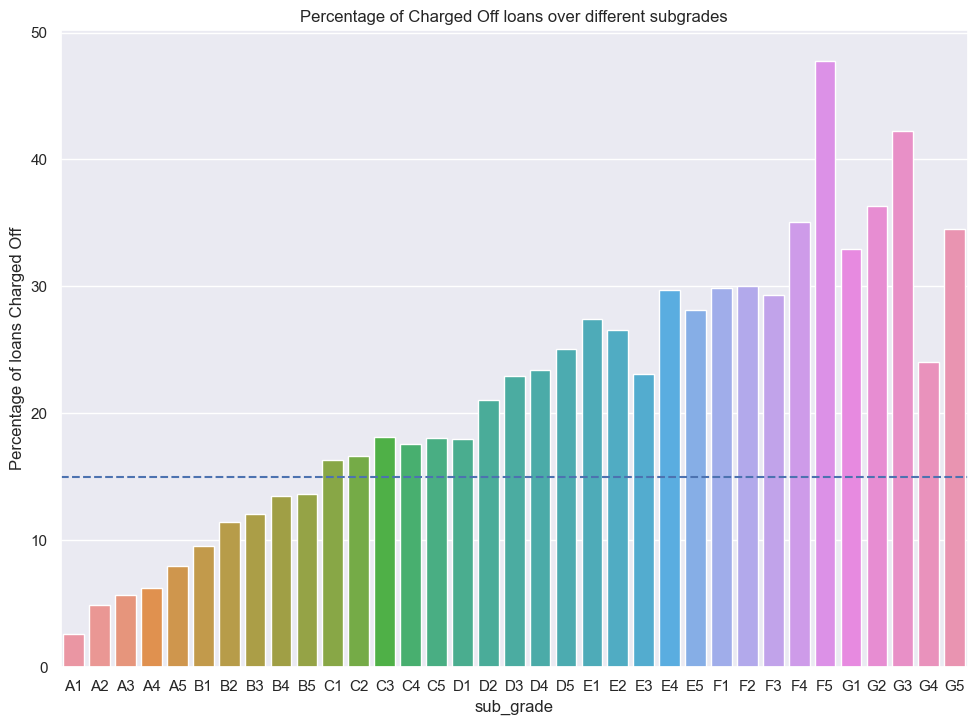

In [226]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
subgradeplot=sns.barplot(x=df_subgrade.index,y=df_subgrade.ChargedOffPercent)
subgradeplot.set_title("Percentage of Charged Off loans over different subgrades")
subgradeplot.set_ylabel("Percentage of loans Charged Off")
subgradeplot.axhline(y=15,linestyle="dashed")

In [ ]:
#Insight6
#In the F5 subgrade,almost 48% of the loans resulted in chargedoff loans 
#In these subgrades F5,G3,G2,F4,G5,G1 the chargedoff loans percentage is very high(more than 33%.Atleast One in every three loans got chargedoff)

In [ ]:
#Impact of verification status and chargedoff loans

In [176]:
df_verifystatus=pd.crosstab(df_clean["verification_status"],df_clean["loan_status"])

In [177]:
df_verifystatus

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,2142,14552
Source Verified,1434,8243
Verified,2051,10155


In [178]:
df_verifystatus["ChargedOffPercent"]=df_verifystatus["Charged Off"]*100/(df_verifystatus["Charged Off"]+df_verifystatus["Fully Paid"])

In [179]:
df_verifystatus

loan_status,Charged Off,Fully Paid,ChargedOffPercent
verification_status,,,
Not Verified,2142,14552,12.830957
Source Verified,1434,8243,14.818642
Verified,2051,10155,16.803212


In [ ]:
#Verification status is not impacting the chargedoff loans 

In [ ]:
#Purpose of the loan and its impact on the loan getting chargedoff

In [184]:
df_purpose=pd.crosstab(df_clean["purpose"],df_clean["loan_status"])

In [185]:
df_purpose

loan_status,Charged Off,Fully Paid
purpose,,
car,160,1339
credit_card,542,4485
debt_consolidation,2767,15288
educational,56,269
home_improvement,347,2528
house,59,308
major_purchase,222,1928
medical,106,575
moving,92,484


In [186]:
df_purpose["ChargedOffPercent"]=df_purpose["Charged Off"]*100/(df_purpose["Charged Off"]+df_purpose["Fully Paid"])

In [187]:
df_purpose

loan_status,Charged Off,Fully Paid,ChargedOffPercent
purpose,,,
car,160,1339,10.673783
credit_card,542,4485,10.781778
debt_consolidation,2767,15288,15.325395
educational,56,269,17.230769
home_improvement,347,2528,12.069565
house,59,308,16.076294
major_purchase,222,1928,10.325581
medical,106,575,15.565345
moving,92,484,15.972222


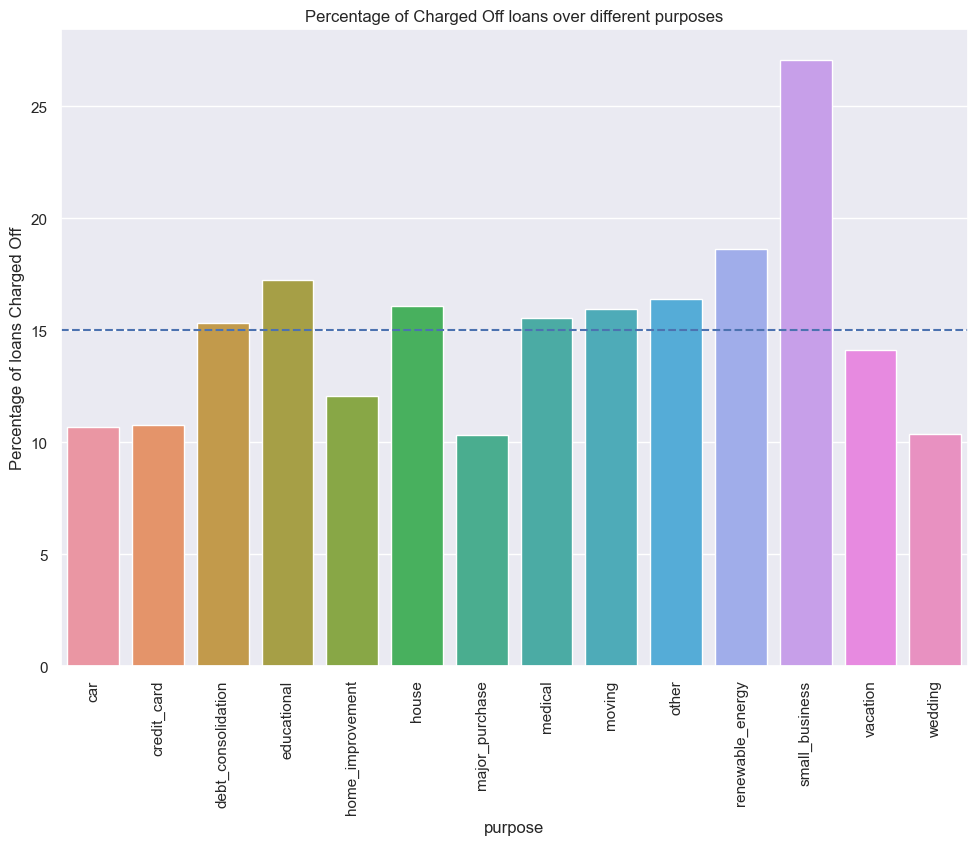

In [221]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
purposeplot=sns.barplot(x=df_purpose.index,y=df_purpose.ChargedOffPercent)
purposeplot.set_title("Percentage of Charged Off loans over different purposes")
purposeplot.set_ylabel("Percentage of loans Charged Off")
purposeplot.set_xticklabels(labels=df_purpose.index,rotation=90)
purposeplot.axhline(y=15,linestyle="dashed")

#dashed line represents the percentage of loans chargedoff in the entire dataset


In [ ]:
###Insight7
#Lending for the purpose of small business turned out to be risky
#More than 27% of the total loans resulted in chargedoff,this is way more than the average of 16%

In [ ]:
#Verifying the impact of various states on chargedoff loans

In [188]:
df_state=pd.crosstab(df_clean["addr_state"],df_clean["loan_status"])

In [189]:
df_state["ChargedOffPercent"]=df_state["Charged Off"]*100/(df_state["Charged Off"]+df_state["Fully Paid"])

In [190]:
df_state

loan_status,Charged Off,Fully Paid,ChargedOffPercent
addr_state,,,
AK,15,63,19.230769
AL,54,381,12.413793
AR,27,208,11.489362
AZ,123,726,14.487633
CA,1125,5824,16.189380
CO,98,668,12.793734
CT,94,632,12.947658
DC,15,196,7.109005
DE,12,101,10.619469


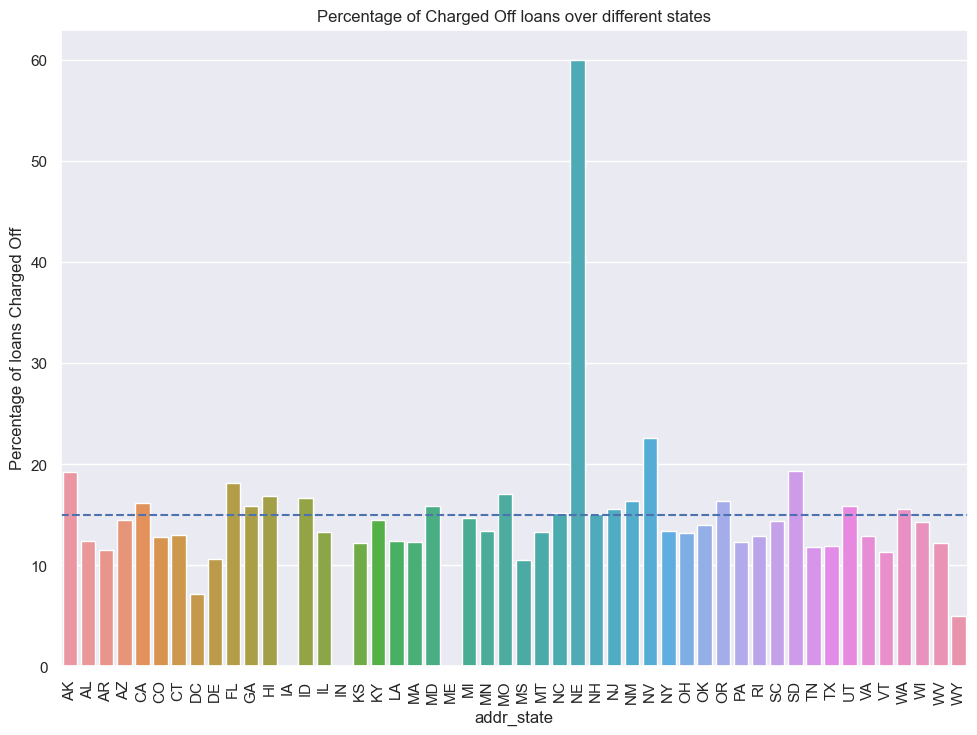

In [222]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
stateplot=sns.barplot(x=df_state.index,y=df_state.ChargedOffPercent)
stateplot.set_title("Percentage of Charged Off loans over different states")
stateplot.set_ylabel("Percentage of loans Charged Off")
stateplot.set_xticklabels(labels=df_state.index,rotation=90)
stateplot.axhline(y=15,linestyle="dashed")


In [ ]:
#Not considering the states where the total loans sample is very small
###Insight8
#The percentage of charged off loans is around 15% in most cases except DC-7% and NV-22.5%.

In [191]:
#The impact of delinq_2yrs on chargedoff loans

In [195]:
df_delinq=pd.crosstab(df_clean["delinq_2yrs"],df_clean["loan_status"])

In [196]:
df_delinq["ChargedOffPercent"]=df_delinq["Charged Off"]*100/(df_delinq["Charged Off"]+df_delinq["Fully Paid"])

In [197]:
df_delinq

loan_status,Charged Off,Fully Paid,ChargedOffPercent
delinq_2yrs,,,
0,4936,29450,14.354679
1,507,2700,15.809167
2,130,543,19.316493
3,35,177,16.509434
4,13,47,21.666667
5,3,18,14.285714
6,1,9,10.000000
7,1,3,25.000000
8,1,1,50.000000


In [ ]:
#Considering only high sample sizes,there is no impact of delinq-2yrs on chargedoff

In [181]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
#impact of pub_rec(derogatory public records) on chargedoff_loans

In [199]:
df_pubrec=pd.crosstab(df_clean["pub_rec"],df_clean["loan_status"])

In [200]:
df_pubrec["ChargedOffPercent"]=df_pubrec["Charged Off"]*100/(df_pubrec["Charged Off"]+df_pubrec["Fully Paid"])

In [201]:
df_pubrec

loan_status,Charged Off,Fully Paid,ChargedOffPercent
pub_rec,,,
0,5160,31347,14.134276
1,457,1556,22.702434
2,10,38,20.833333
3,0,7,0.000000
4,0,2,0.000000


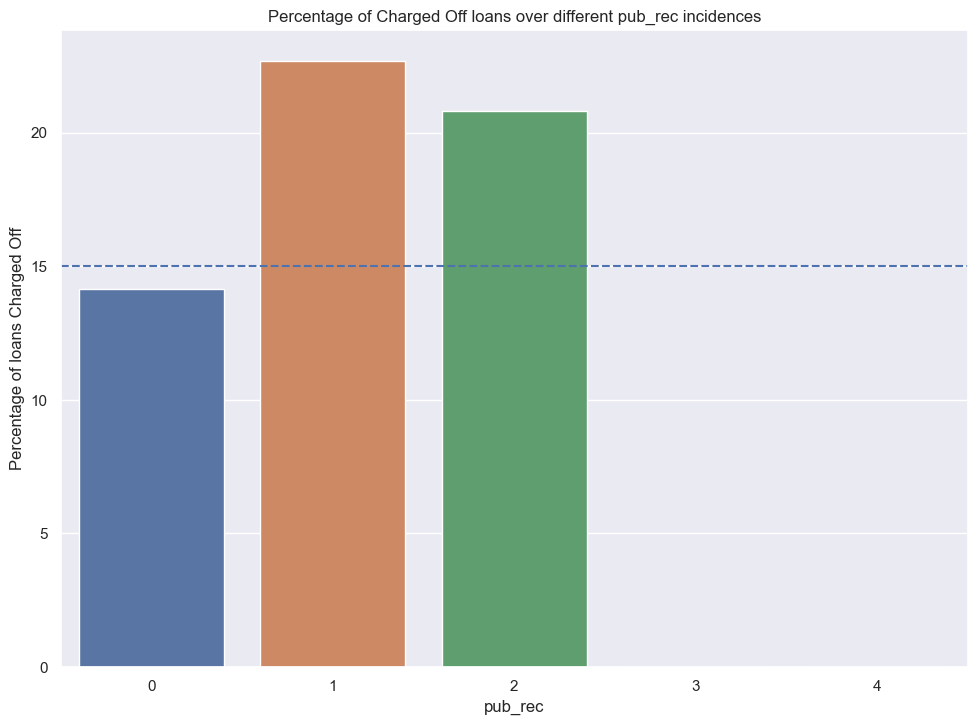

In [224]:
pubrecplot=sns.barplot(x=df_pubrec.index,y=df_pubrec.ChargedOffPercent)
pubrecplot.set_title("Percentage of Charged Off loans over different pub_rec incidences")
pubrecplot.set_ylabel("Percentage of loans Charged Off")
pubrecplot.axhline(y=15,linestyle="dashed")


In [ ]:
###Insight9
#When there is one pubrec,the percent of chargedoff loans is high when compared to average
#(The other sample sizes are very small,so not considering them)

In [ ]:
#Impact of pub_rec_bankruptcies on chargedoff loans

In [202]:
df_pubrecbankrupt=pd.crosstab(df_clean["pub_rec_bankruptcies"],df_clean["loan_status"])

In [203]:
df_pubrecbankrupt["ChargedOffPercent"]=df_pubrecbankrupt["Charged Off"]*100/(df_pubrecbankrupt["Charged Off"]+df_pubrecbankrupt["Fully Paid"])

In [204]:
df_pubrecbankrupt

loan_status,Charged Off,Fully Paid,ChargedOffPercent
pub_rec_bankruptcies,,,
0.0,5259,31676,14.238527
1.0,366,1271,22.357972
2.0,2,3,40.000000


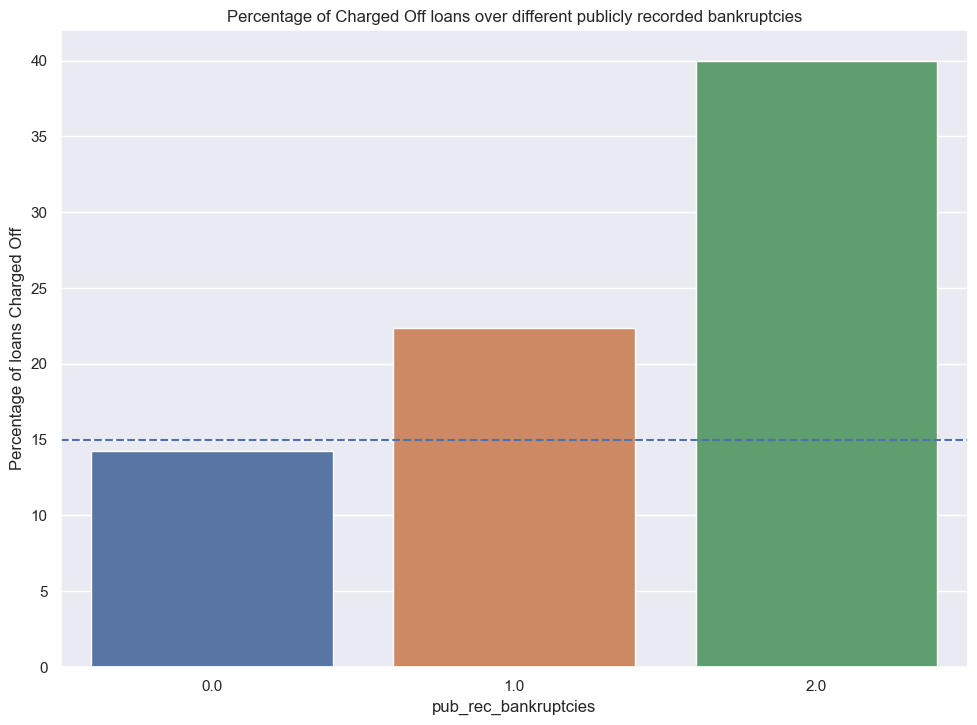

In [225]:
pubrecbankruptplot=sns.barplot(x=df_pubrecbankrupt.index,y=df_pubrecbankrupt.ChargedOffPercent)
pubrecbankruptplot.set_title("Percentage of Charged Off loans over different publicly recorded bankruptcies")
pubrecbankruptplot.set_ylabel("Percentage of loans Charged Off")
pubrecbankruptplot.axhline(y=15,linestyle="dashed")


In [ ]:
###Insight10
#When there is on pub_rec_bankruptcy,the percent of chargedoff loans is high when compared to average
#(The other sample sizes are very small,so not considering them)